## This is an analysis of events related to covid-19. This kind of analysis would be useful to predict the impact of future pandemics on civil society and coming up with preventative solutions that will mitigate the amount of violence, fear and unrest.  There WILL be another pandemic, the magnitude and severity, I do not know. Poaching and wildlife trafficking have direct influence over the emergence and spread of new and existing zoonotic diseases. COVID-19 is said to have originated in China from a wet market or I have recently heard it may have come from a wildlife farm.

In [1]:
# https://acleddata.com/acleddatanew/wp-content/uploads/dlm_uploads/2020/04/ACLED_Direct-COVID19-Disorder_Methodology-Brief_4.2020.pdf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_excel('coronavirus_Mar12_update.xlsx')


C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df2 = df.copy()

In [3]:
df = df.set_index(df['EVENT_DATE'])

In [4]:
df['EVENT_DATE'].describe()

C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                   41489
unique                    417
top       2020-05-01 00:00:00
freq                      356
first     2018-04-13 00:00:00
last      2021-03-12 00:00:00
Name: EVENT_DATE, dtype: object

In [5]:
df['FATALITIES'].value_counts()

0      41193
1        204
2         49
3         17
4          7
5          5
6          3
125        2
20         2
8          2
24         1
22         1
11         1
9          1
7          1
Name: FATALITIES, dtype: int64

In [6]:
deaths = df[df['FATALITIES'] ==125]

## On April 8th Houthi rebels attacked Marib and Al-Hudaydah by launching missiles before a cease-fire was called by a Saudi-led coalition. 

## https://crisis24.garda.com/insights-intelligence/intelligence/risk-alerts/6zzstfdv5dy9zyyck/yemen-houthi-forces-fire-missiles-at-marib-and-al-hudaydah-april-8

In [7]:
deaths

ISO EVENT_ID_CNTY  EVENT_ID_NO_CNTY EVENT_DATE  YEAR  \
EVENT_DATE                                                         
2020-04-08  887      YEM55337             55337 2020-04-08  2020   
2020-04-08  887      YEM55338             55338 2020-04-08  2020   

            TIME_PRECISION                  EVENT_TYPE SUB_EVENT_TYPE  \
EVENT_DATE                                                              
2020-04-08               1  Violence against civilians         Attack   
2020-04-08               1  Violence against civilians         Attack   

                                                       ACTOR1 ASSOC_ACTOR_1  \
EVENT_DATE                                                                    
2020-04-08  Military Forces of Yemen (2016-) Supreme Polit...           NaN   
2020-04-08  Military Forces of Yemen (2016-) Supreme Polit...           NaN   

            INTER1                ACTOR2             ASSOC_ACTOR_2  INTER2  \
EVENT_DATE                                                                   
2020-04-08       1  Civilians (Ethiopia)  Refugees/IDPs (Ethiopia)       7   
2020-04-08       1  Civilians (Ethiopia)  Refugees/IDPs (Ethiopia)       7   

            INTERACTION       REGION COUNTRY ADMIN1    ADMIN2 ADMIN3 LOCATION  \
EVENT_DATE                                                                      
2020-04-08           17  Middle East   Yemen  Sadah    Haydan    NaN   Haydan   
2020-04-08           17  Middle East   Yemen  Sadah  Monabbih    NaN  Ar Raqw   

            LATITUDE  LONGITUDE  GEO_PRECISION          SOURCE   SOURCE_SCALE  \
EVENT_DATE                                                                      
2020-04-08    16.779     43.434              1  New York Times  International   
2020-04-08    17.255     43.203              1  New York Times  International   

                                                        NOTES  FATALITIES  \
EVENT_DATE                                                                  
2020-04-08  On 8 April 2020, Houthi forces reportedly atta...         125   
2020-04-08  On 8 April 2020, Houthi forces reportedly atta...         125   

             TIMESTAMP  
EVENT_DATE              
2020-04-08  1594062853  
2020-04-08  1594062853

In [8]:
df['EVENT_TYPE'].value_counts()

Protests                      37107
Riots                          2609
Strategic developments         1015
Violence against civilians      654
Battles                          87
Explosions/Remote violence       17
Name: EVENT_TYPE, dtype: int64

In [9]:
df['REGION'].value_counts()

Europe                       11735
Middle East                   7763
North America                 6477
South America                 5289
South Asia                    4414
East Asia                     1480
Northern Africa               1187
Southeast Asia                 624
Caucasus and Central Asia      572
Central America                559
Eastern Africa                 373
Western Africa                 351
Southern Africa                340
Middle Africa                  171
Caribbean                      154
Name: REGION, dtype: int64

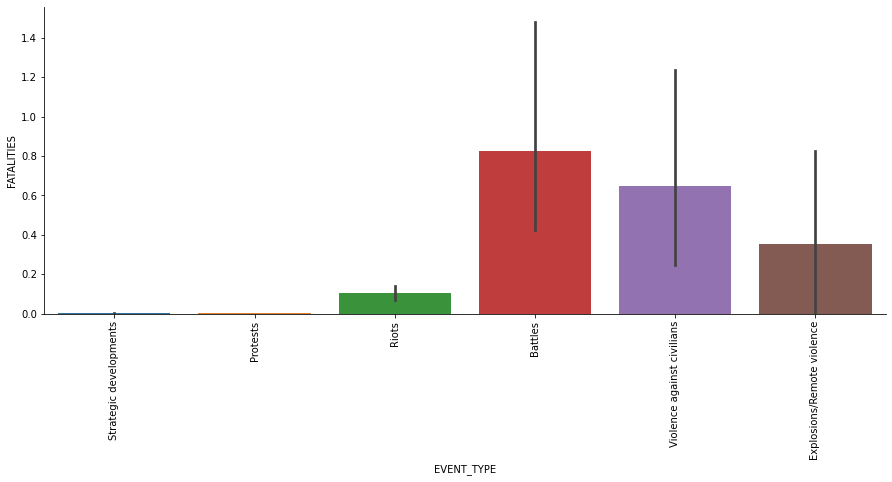

In [10]:
g = sns.catplot('EVENT_TYPE', 'FATALITIES', data=df, kind='bar', aspect=2.5)
g.set_xticklabels(rotation=90)

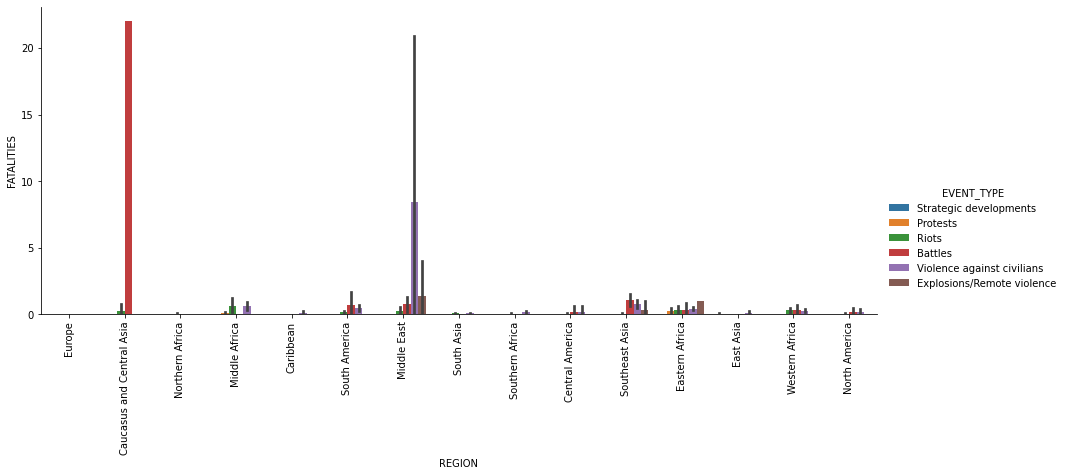

In [11]:
g = sns.catplot('REGION', 'FATALITIES', hue='EVENT_TYPE',data=df, kind='bar', aspect=2.5)
g.set_xticklabels(rotation=90)

In [12]:
Asia = df[df['REGION'] == 'Caucasus and Central Asia']
Middle_Africa = df[df['REGION'] == 'Middle Africa']
South_America = df[df['REGION'] == 'South America']
Middle_East = df[df['REGION'] == 'Middle East']
Eastern_Africa = df[df['REGION'] == 'Eastern Africa']

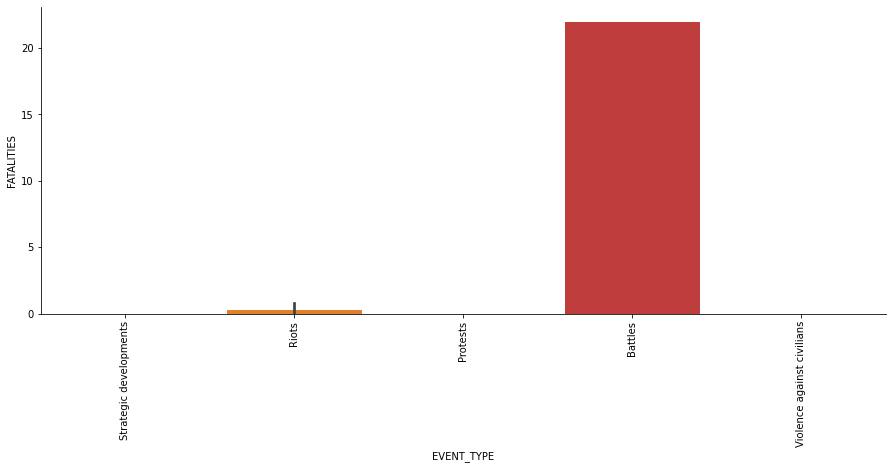

In [13]:
g = sns.catplot('EVENT_TYPE', 'FATALITIES', data=Asia, kind='bar', aspect=2.5)
g.set_xticklabels(rotation=90)

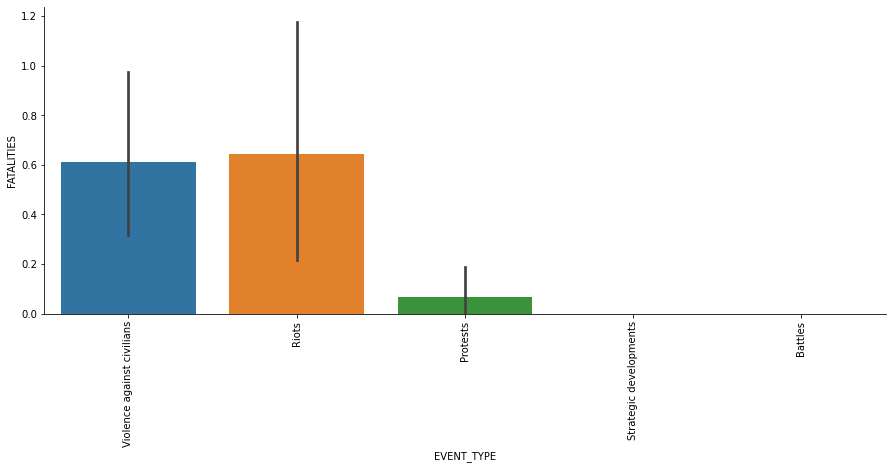

In [14]:
g = sns.catplot('EVENT_TYPE', 'FATALITIES', data=Middle_Africa, kind='bar', aspect=2.5)
g.set_xticklabels(rotation=90)

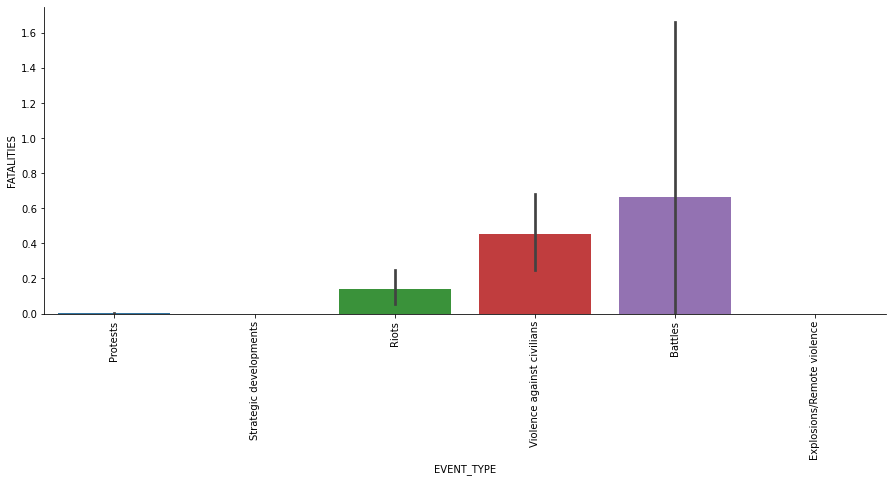

In [15]:
g = sns.catplot('EVENT_TYPE', 'FATALITIES', data=South_America, kind='bar', aspect=2.5)
g.set_xticklabels(rotation=90)

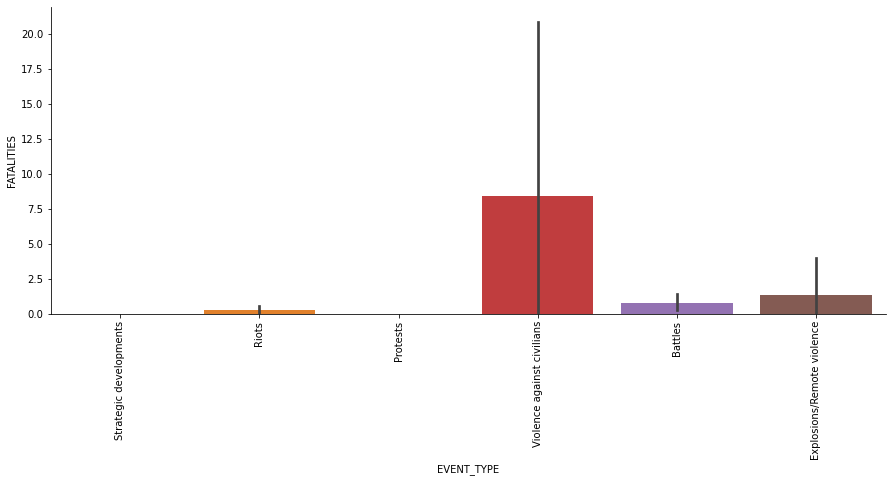

In [16]:
g = sns.catplot('EVENT_TYPE', 'FATALITIES', data=Middle_East, kind='bar', aspect=2.5)
g.set_xticklabels(rotation=90)

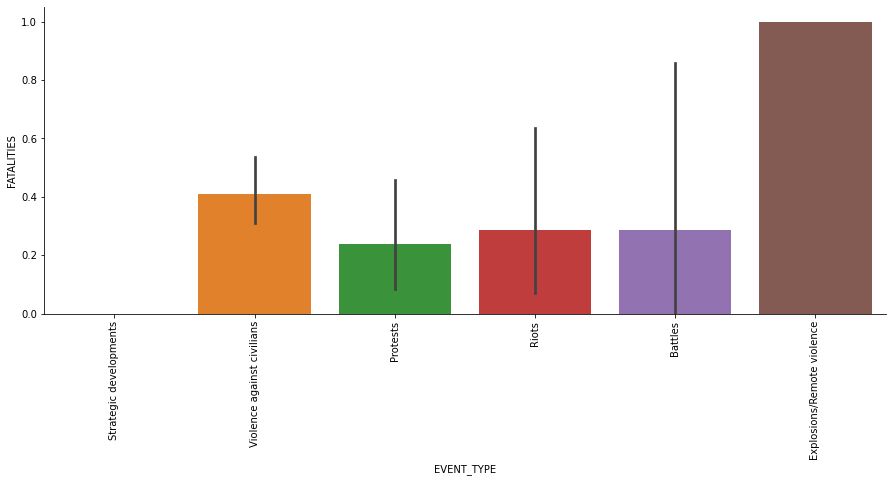

In [17]:
g = sns.catplot('EVENT_TYPE', 'FATALITIES', data=Eastern_Africa, kind='bar', aspect=2.5)
g.set_xticklabels(rotation=90)

In [18]:
grouped_regions = df2.groupby(['EVENT_DATE','REGION', 'EVENT_TYPE'])['INTERACTION', 'FATALITIES'].sum()

C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [19]:
sorted_death_count = grouped_regions.sort_values('FATALITIES',ascending=False)

In [20]:
sorted_death_count.describe()

INTERACTION   FATALITIES
count   5920.000000  5920.000000
mean     388.180912     0.135642
std      969.003285     3.336459
min       10.000000     0.000000
25%       37.000000     0.000000
50%       72.000000     0.000000
75%      300.000000     0.000000
max    12908.000000   250.000000

In [21]:
start = sorted_death_count.head(50)

In [22]:
end = sorted_death_count.tail(50)

In [23]:
start

INTERACTION  \
EVENT_DATE REGION                    EVENT_TYPE                                
2020-04-08 Middle East               Violence against civilians          112   
2020-03-21 South America             Riots                               145   
2020-07-30 Caucasus and Central Asia Battles                              11   
2020-08-23 Eastern Africa            Riots                                15   
2020-03-31 Middle East               Riots                                15   
2020-08-18 Eastern Africa            Protests                             96   
2020-11-29 South Asia                Riots                                55   
2020-04-27 South America             Riots                               204   
2020-03-23 South America             Riots                                45   
2020-03-31 Western Africa            Riots                                87   
2020-09-09 South America             Riots                               147   
2020-05-03 Southeast Asia            Battles                              24   
2020-05-09 Caucasus and Central Asia Riots                                15   
2020-04-07 Middle Africa             Violence against civilians           27   
2020-05-12 Western Africa            Riots                                30   
2020-04-30 South America             Riots                               103   
2020-03-29 Middle East               Riots                               100   
2020-03-20 Middle Africa             Protests                             16   
2020-04-06 Western Africa            Riots                               187   
2020-05-02 Western Africa            Riots                                95   
2020-05-26 Middle East               Explosions/Remote violence           13   
2020-03-30 Middle Africa             Riots                                15   
           Middle East               Riots                                87   
2020-07-09 Middle Africa             Riots                                15   
2020-03-21 South Asia                Riots                                85   
2020-04-24 Southeast Asia            Battles                              12   
2020-04-01 South America             Battles                              13   
2020-03-21 South America             Violence against civilians           54   
2020-06-04 South America             Battles                              13   
2020-05-30 Eastern Africa            Violence against civilians           17   
2020-06-23 Eastern Africa            Violence against civilians           37   
2020-04-16 South Asia                Riots                               373   
2020-04-07 Southeast Asia            Battles                              36   
2020-10-28 South America             Riots                                30   
2020-12-14 Eastern Africa            Violence against civilians           17   
2020-06-24 Middle Africa             Violence against civilians           17   
2020-05-15 South Asia                Riots                               212   
2020-08-17 Eastern Africa            Protests                             32   
2020-06-09 Middle Africa             Riots                                15   
2020-04-01 Eastern Africa            Violence against civilians          153   
2020-04-19 Southeast Asia            Battles                              12   
2020-10-15 Southeast Asia            Violence against civilians           37   
2020-08-19 Eastern Africa            Protests                             92   
2020-04-20 Middle East               Battles                              11   
           Middle Africa             Riots                                70   
2020-05-12 North America             Riots                               100   
2020-06-27 South America             Violence against civilians           74   
2020-05-03 Eastern Africa            Violence against civilians           34   
2020-04-02 Southeast Asia            Violence against civilians  

In [58]:
events = df.loc['2019-11-01':]

In [64]:
fig = px.bar(events, x="EVENT_DATE", y="FATALITIES", 
             color='REGION', hover_name= 'COUNTRY', barmode = 'stack')
 
fig.show()

fig.write_html("covid events.html")